In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
files =[file for file in os.listdir("./data")]
for file in files:
    print(file)

Sales_August_2019.csv
Sales_March_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_May_2019.csv
Sales_July_2019.csv
Sales_September_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_April_2019.csv
Sales_November_2019.csv
Sales_January_2019.csv


Creamos un dataframe con todos los archivos

In [9]:
path = "./data"

#blank dataframe
all_data = pd.DataFrame()

In [10]:
for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(186850, 6)

Guardamos los datos en un csv

In [12]:
all_data.to_csv('./data/all_data.csv',index=False)

In [13]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [16]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [17]:
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 6)

Vamos a obtener los meses.

In [18]:
'04/19/19 08:46'.split('/')[0]

'04'

In [19]:
def month(x):
    return x.split('/')[0]

In [20]:
all_data['Month']=all_data['Order Date'].apply(month)

/home/patricia/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


In [23]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

Vamos a convertir la columna Month a int

In [24]:
all_data['Month'] = all_data['Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [28]:
all_data['Month'].unique()

array(['08', 'Order Date', '09', '03', '04', '12', '01', '02', '05', '06',
       '07', '10', '11'], dtype=object)

In [29]:
filter=all_data['Month']=='Order Date'

185950

In [30]:
all_data=all_data[~filter]

In [31]:
all_data.shape

(185950, 7)

In [32]:
all_data['Month'] = all_data['Month'].astype(int)

/home/patricia/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [37]:
all_data['Price Each']=all_data['Price Each'].astype(float)

/home/patricia/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

/home/patricia/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
sales               float64
dtype: object

In [39]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

/home/patricia/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [42]:
all_data.groupby('Month')['sales'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

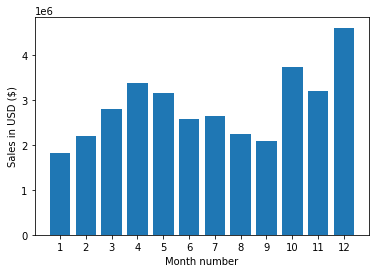

<Figure size 432x288 with 0 Axes>

In [43]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()
plt.savefig("./images/month.png")